### 大样本的意义

当我们增加样本容量时，即使是最小的差异看起来也可能变得非常显著。 

为了说明这一点，请完成这个 notebook 和下面的测试题目。

首先，导入库和数据。

In [247]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')

`1.` 在这个案例中，假设我们想要测试 `full_data` 中所有个体的平均身高是否等于67.60英寸或 **不等于** 67.60 英寸。  首先，通过下面的 **测试 1** 来确定这些案例的零假设和备择假设。

`2.` 人口平均身高是多？人口身高的标准差是多少？使用下面的代码创建一组样本数据。样本的平均身高是多少？模拟五个值的平均值的抽样分布，查看其形状并绘制一个直方图。这五次抽样的平均值的抽样分布的标准差是多少？回答下面的 **测试 2** ，确保你的答案是正确的。

In [248]:
full_data.head()

,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179
1,1864,>=21,True,65.824249
2,2060,<21,False,71.319854
3,7875,>=21,True,68.569404
4,6254,<21,True,64.020226


In [249]:
full_data.height.mean()

67.59748697307937

In [250]:
full_data.height.std()

3.119433206550344

In [251]:
sample1 = full_data.sample(5)

In [252]:
sample1.height.mean()

67.88234252049084

In [253]:
means = []
for a in range(10000):
    bootsamp = sample1.sample(5, replace = True)
    mean = bootsamp.height.mean() 
    means.append(mean)
        

In [254]:
std_sampling_dist = full_data.height.std()/np.sqrt(5)

In [255]:
std_sampling_dist 

1.3950529402233423

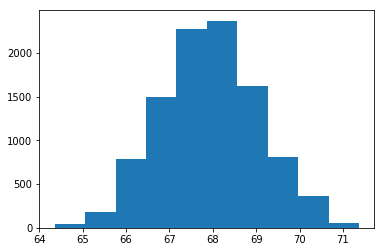

In [256]:
plt.hist(means);

`3.` 使用问题1中的零假设和备择假设以及问题2中抽样分布的结果，模拟你在零假设中的期望平均值。使用这些模拟值来确定一个p值，做出一个关于零假设和备择假设的决定。通过下面的 **测试 3** 和 **测试 4** 来检查你的解决方案。

**提示:**  [这里](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html) 的 Numpy 文件可以帮你完成你的解决方案。

`4.` 现在，假设你从上面问题2中的样本中得到了相同的样本均值，但是样本数量是1000。对于这1000个值的平均值，你的抽样分布的新标准差是多少？此外，你的新p值是在你设定的零假设和备择假设之间选择的吗？模拟五个值的平均值的抽样分布，查看其形状并绘制一个直方图。在这里根据你的解决方案来回答下面的第二个到最后一个测试题目。

**提示：**  需要注意的是，如果遇到任何困难，你可以使用测试中的解决方案，尽早找到 p 值，只需稍作更改即可获得该答案。

`5.` 通过回答最后一个测试题目，回顾本节内容。

In [257]:
null_vals = np.random.normal(67.6, std_sampling_dist, 10000)

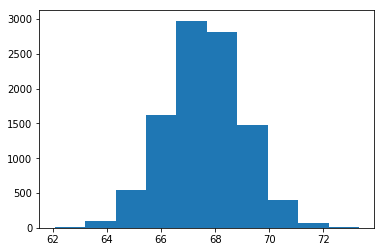

In [258]:
plt.hist(null_vals);

In [259]:
sample_mean = sample1.height.mean()

In [260]:
null_mean =  67.6
(null_vals > sample_mean).mean() + (null_vals < null_mean + (null_mean - sample_mean)).mean()

0.8404

In [261]:
low_ext = (null_mean - (sample1.height.mean() - null_mean))
high_ext = sample1.height.mean()
(null_vals > high_ext).mean() + (null_vals < low_ext).mean()

0.8404

In [262]:
full_data.height.std()/np.sqrt(1000)

0.09864513941461567

In [263]:
null_vals2 = np.random.normal(67.6, full_data.height.std()/np.sqrt(1000), 10000)

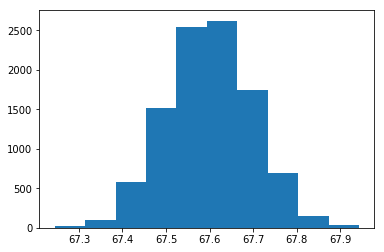

In [264]:
plt.hist(null_vals2);

In [265]:
low_ext = (null_mean - (sample1.height.mean() - null_mean))
high_ext = sample1.height.mean()
(null_vals2 > high_ext).mean() + (null_vals2 < low_ext).mean()

0.0046